In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("data_after_EDA.csv").drop(columns=["Unnamed: 0"])
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,...,city mpg,Popularity,MSRP,sqrt_MSRP,log_MSRP,sin_MSRP,cos_MSRP,Market Category Luxury,Market Category High Performance,Market Category Performance
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",...,19,3916,46135,214.790596,10.739349,-0.653260,-0.757134,True,True,False
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",...,19,3916,40650,201.618452,10.612779,-0.803204,-0.595703,True,False,True


In [73]:
# Make(Brand) with count of the high-performance car
# max sales of make according to year 


In [74]:
# mean of MSRP of every make
df_mean_of_MSRP_of_Make = pd.DataFrame(df.groupby(by="Make")["MSRP"].mean())

In [75]:
df_mean_of_MSRP_of_Make.dtypes

MSRP    float64
dtype: object

In [76]:
df_mean_of_MSRP_of_Make_top10 = df_mean_of_MSRP_of_Make.sort_values(by="MSRP",ascending=False)[0:10]

In [77]:
df_mean_of_MSRP_of_Make_top10

,MSRP
Make,
Bugatti,1.757224e+06
Maybach,5.462219e+05
Rolls-Royce,3.511306e+05
Lamborghini,3.315673e+05
Bentley,2.471693e+05
McLaren,2.398050e+05
Ferrari,2.382188e+05
Spyker,2.133233e+05
Aston Martin,1.979104e+05


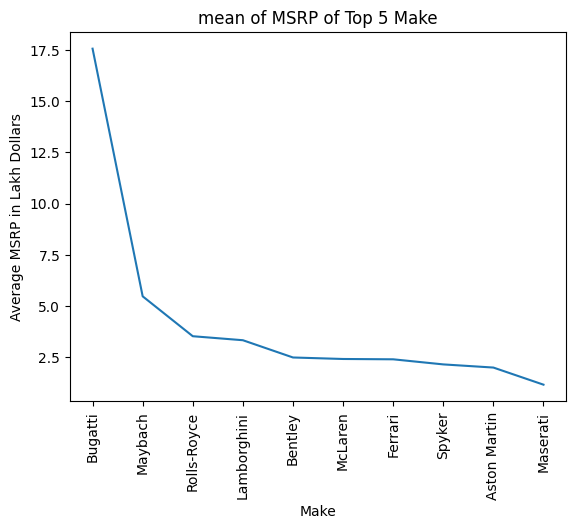

In [78]:
plt.plot(df_mean_of_MSRP_of_Make_top10/100000)
plt.title("mean of MSRP of Top 5 Make")
plt.xlabel("Make")
plt.xticks(rotation=90)
plt.ylabel("Average MSRP in Lakh Dollars")
plt.show()

In [79]:
# average sales of these brand in 2017

In [80]:
top_10 = list(df_mean_of_MSRP_of_Make_top10.index)

In [81]:
top_10

['Bugatti',
 'Maybach',
 'Rolls-Royce',
 'Lamborghini',
 'Bentley',
 'McLaren',
 'Ferrari',
 'Spyker',
 'Aston Martin',
 'Maserati']

In [82]:
df[["Make","Year"]].values

array([['BMW', 2011],
       ['BMW', 2011],
       ['BMW', 2011],
       ...,
       ['Acura', 2012],
       ['Acura', 2013],
       ['Lincoln', 2006]], shape=(11801, 2), dtype=object)

In [83]:
# d =dict.fromkeys(top_10)
# d["Bugatti"].add("1")
# d

In [84]:
# find the year where these all brands are listed
d ={x:set() for x in top_10}
for mk,y in df[["Make","Year"]].values:                           # Factory Tuner,Luxury,High-Performance            
    if mk in d:
        d[mk].add(y)
for data in d:
    print(data,d[data])

Bugatti {2008, 2009}
Maybach {2010, 2011, 2012}
Rolls-Royce {2016, 2001, 2002, 2012, 2013, 2014, 2015}
Lamborghini {2016, 2001, 2008, 2009, 2010, 2012, 2013, 2014, 2015}
Bentley {2016, 2001, 2003, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
McLaren {2016, 2012, 2013, 2015}
Ferrari {2001, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}
Spyker {2009}
Aston Martin {2016, 2003, 2004, 2005, 2006, 2010, 2011, 2012, 2013, 2014, 2015}
Maserati {2016, 2017, 2003, 2004, 2005, 2006, 2014, 2015}


In [85]:
df_average_sales_of_top_10_make_in_2009_2010_2015 =  df.query(""" `Make` in @top_10 and `Year` in (2010,2009,2015)""")

In [86]:
data = df_average_sales_of_top_10_make_in_2009_2010_2015.groupby(by=["Make","Year"])["MSRP"].mean()

In [87]:
data = pd.DataFrame(data)
data.index.get_level_values(0)

Index(['Aston Martin', 'Aston Martin', 'Bentley', 'Bentley', 'Bentley',
       'Bugatti', 'Ferrari', 'Ferrari', 'Ferrari', 'Lamborghini',
       'Lamborghini', 'Lamborghini', 'Maserati', 'Maybach', 'McLaren',
       'Rolls-Royce', 'Spyker'],
      dtype='object', name='Make')

In [88]:
df_mean_of_MSRP_of_Make_top10

,MSRP
Make,
Bugatti,1.757224e+06
Maybach,5.462219e+05
Rolls-Royce,3.511306e+05
Lamborghini,3.315673e+05
Bentley,2.471693e+05
McLaren,2.398050e+05
Ferrari,2.382188e+05
Spyker,2.133233e+05
Aston Martin,1.979104e+05


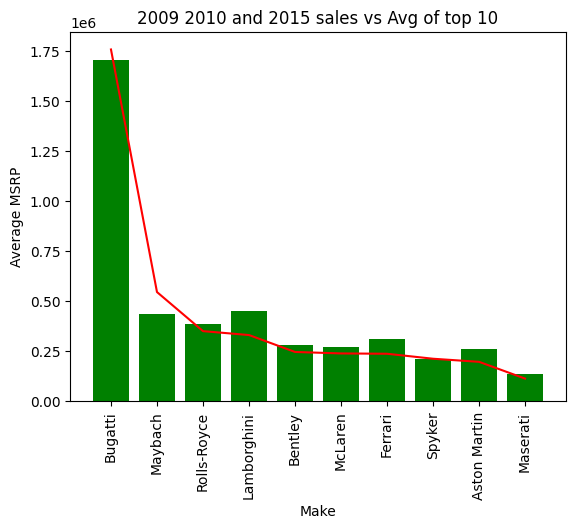

In [89]:
plt.plot(df_mean_of_MSRP_of_Make_top10,color = "r",data=df_mean_of_MSRP_of_Make_top10.MSRP)
plt.bar(data.index.get_level_values(0),height=data["MSRP"],color="g")
plt.title("2009 2010 and 2015 sales vs Avg of top 10")
plt.xlabel("Make")
plt.xticks(rotation=90)
plt.ylabel("Average MSRP")
plt.show()

In [90]:
data = df_average_sales_of_top_10_make_in_2009_2010_2015.groupby(by=["Make"])["MSRP"].mean()

In [91]:
data

Make
Aston Martin    1.836228e+05
Bentley         2.550752e+05
Bugatti         1.705769e+06
Ferrari         2.674789e+05
Lamborghini     4.065600e+05
Maserati        1.348551e+05
Maybach         4.345000e+05
McLaren         2.728625e+05
Rolls-Royce     3.865500e+05
Spyker          2.133233e+05
Name: MSRP, dtype: float64

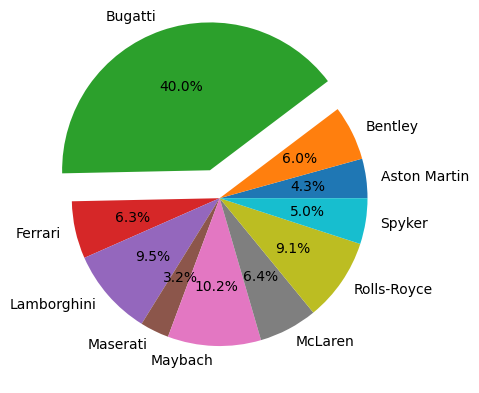

In [92]:
plt.pie(data,labels=data.index,explode=[0,0,0.2,0,0,0,0,0,0,0],autopct="%.1f%%")
# plt.legend(loc="right")
plt.show()

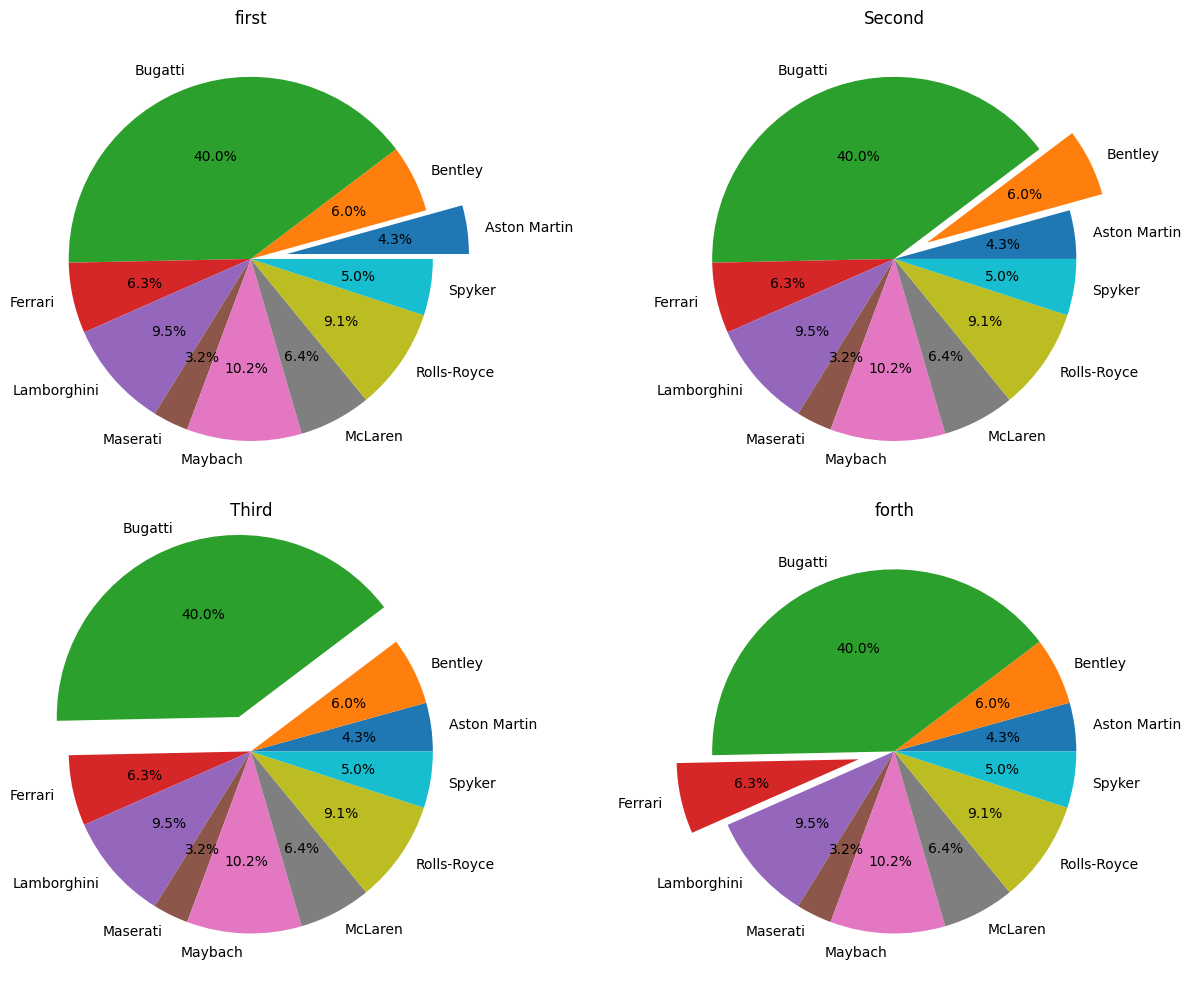

In [93]:
fig,ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].pie(data,labels=data.index,explode=[0.2,0,0,0,0,0,0,0,0,0],autopct="%.1f%%")
ax[0,0].set_title("first")
ax[0,1].pie(data,labels=data.index,explode=[0,0.2,0,0,0,0,0,0,0,0],autopct="%.1f%%",)
ax[0,1].set_title("Second")
ax[1,0].pie(data,labels=data.index,explode=[0,0,0.2,0,0,0,0,0,0,0],autopct="%.1f%%",)
ax[1,0].set_title("Third")
ax[1,1].pie(data,labels=data.index,explode=[0,0,0,0.2,0,0,0,0,0,0],autopct="%.1f%%")
ax[1,1].set_title("forth")
plt.tight_layout()
plt.show()